# || The Sparks Foundation || GRIPDEC20 DSBA Task 7

# Author: Meenakshi Vashistha

### Timeline Analysis : Covid-19
### Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts

### Dataset Info: contained information from '24-02-2020' [Feb] to  '18-12-2020' [Dec]

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

#### Reading Dataset

In [2]:
covid_data=pd.read_csv('owid-covid-data.csv')

#### Exploring Dataset

In [3]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,NaN,NaN,NaN,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

#### Created a dataframe with new selected columns

In [5]:
data1=covid_data[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases','population', 'median_age',
       'aged_65_older','diabetes_prevalence']]

#### Exploring New created Dataframe

In [6]:
data1.shape

(54932, 10)

In [7]:
data1.dtypes

iso_code                object
continent               object
location                object
date                    object
total_cases            float64
new_cases              float64
population             float64
median_age             float64
aged_65_older          float64
diabetes_prevalence    float64
dtype: object

In [8]:
data1.isnull().mean()

iso_code               0.005753
continent              0.011796
location               0.000000
date                   0.000000
total_cases            0.010067
new_cases              0.013526
population             0.005753
median_age             0.048223
aged_65_older          0.059328
diabetes_prevalence    0.027197
dtype: float64

#### Correlation between different variables

In [9]:
data1.corr()

,total_cases,new_cases,population,median_age,aged_65_older,diabetes_prevalence
total_cases,1.000000,0.953170,0.655759,0.025554,0.020773,0.024197
new_cases,0.953170,1.000000,0.696422,0.032423,0.029602,0.024043
population,0.655759,0.696422,1.000000,0.010698,-0.003231,0.028814
median_age,0.025554,0.032423,0.010698,1.000000,0.913372,0.164463
aged_65_older,0.020773,0.029602,-0.003231,0.913372,1.000000,-0.071279
diabetes_prevalence,0.024197,0.024043,0.028814,0.164463,-0.071279,1.000000


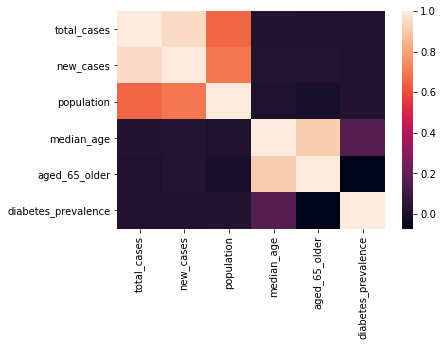

In [10]:
sns.heatmap(data1.corr())

#### Exploring Data through visualizations

Text(0.5, 0, 'Name of the Continent')

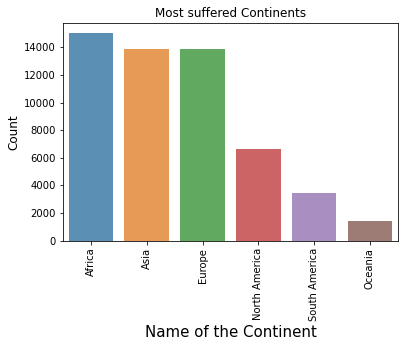

In [11]:
case1=data1['continent'].value_counts().sort_values(ascending=False)
Most_case1 =sns.barplot(case1.index, case1.values, alpha=0.8)
Most_case1.set_xticklabels(rotation=90,labels=case1.index,fontsize=10)
plt.title('Most suffered Continents')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Continent', fontsize=15)

Text(0.5, 0, 'Name of the Coutry')

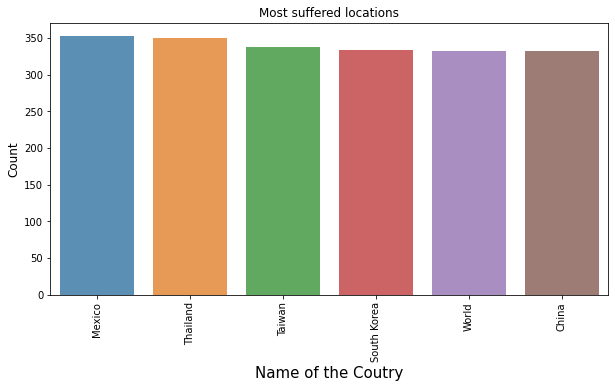

In [12]:
plt.figure(figsize=(10,5))
case=data1['location'].value_counts().sort_values(ascending=False)
case=case[:6]
Most_case =sns.barplot(case.index, case.values, alpha=0.8)
Most_case.set_xticklabels(rotation=90,labels=case.index,fontsize=10)
plt.title('Most suffered locations')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Coutry', fontsize=15)

Text(0.5, 1.0, 'Variation in cases with the time')

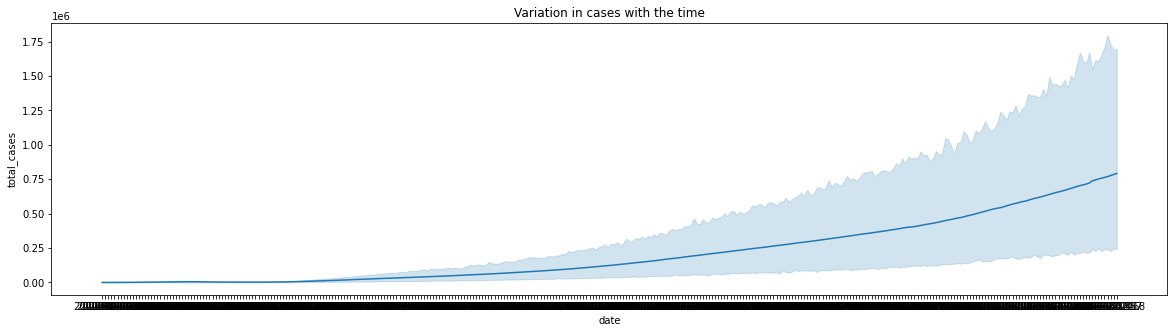

In [13]:
plt.figure(figsize=(20,5))
sns.lineplot(x='date', y='total_cases', data=data1)
plt.title('Variation in cases with the time')

#### Creating DataFrames for numerical and categorical features

In [14]:
# Create a dataframe for numeric features
num=data1.select_dtypes(include='number')

# Create a dataframe for categorical features
char=data1.select_dtypes(include='object')

#### Imputation of missing values 

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [17]:
num_1.describe()

,total_cases,new_cases,population,median_age,aged_65_older,diabetes_prevalence
count,5.493200e+04,5.493200e+04,5.493200e+04,54932.000000,54932.000000,54932.000000
mean,2.425533e+05,2.792888e+03,9.170548e+07,30.671490,8.866911,7.754580
std,2.342967e+06,2.524073e+04,6.210740e+08,8.899203,6.077116,3.802753
min,1.000000e+00,-4.607600e+04,8.090000e+02,15.100000,1.144000,0.990000
25%,4.250000e+02,1.000000e+00,2.877800e+06,22.900000,3.548000,5.310000
50%,4.351500e+03,3.900000e+01,1.009927e+07,30.671490,6.981000,7.110000
75%,4.377650e+04,4.620000e+02,3.297185e+07,38.700000,13.928000,9.850000
max,7.567281e+07,1.493133e+06,7.794799e+09,48.200000,27.049000,30.530000


#### Removal of Extreme Values and Outliers from the numerical features

In [18]:
def outlier_cap(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return(x)

In [19]:
num_1=num_1.apply(lambda x : outlier_cap(x))
num_1.describe(percentiles=[0.01,0.1,0.15,0.2,0.25,0.5,0.75,0.9,0.95,0.99])

,total_cases,new_cases,population,median_age,aged_65_older,diabetes_prevalence
count,5.493200e+04,54932.000000,5.493200e+04,54932.000000,54932.000000,54932.000000
mean,1.238442e+05,1454.779925,5.329421e+07,30.676161,8.843531,7.723861
std,5.194853e+05,5797.486258,1.913118e+08,8.884777,6.010726,3.668961
min,1.000000e+00,0.000000,3.393800e+04,16.400000,1.307000,1.820000
1%,1.000000e+00,0.000000,3.393800e+04,16.400000,1.307000,1.820000
10%,2.500000e+01,0.000000,4.415390e+05,18.700000,2.822000,3.300000
15%,8.200000e+01,0.000000,8.964440e+05,19.400000,3.002000,4.000000
20%,1.950000e+02,0.000000,1.932774e+06,20.300000,3.165000,4.780000
25%,4.250000e+02,1.000000,2.877800e+06,22.900000,3.548000,5.310000
50%,4.351500e+03,39.000000,1.009927e+07,30.671490,6.981000,7.110000


#### Character Encoding

In [20]:
char_encode=pd.get_dummies(char_1)

In [21]:
char_encode.head()

,iso_code_AFG,iso_code_AGO,iso_code_ALB,iso_code_AND,iso_code_ARE,iso_code_ARG,iso_code_ARM,iso_code_ATG,iso_code_AUS,iso_code_AUT,iso_code_AZE,iso_code_BDI,iso_code_BEL,iso_code_BEN,iso_code_BFA,iso_code_BGD,iso_code_BGR,iso_code_BHR,iso_code_BHS,iso_code_BIH,iso_code_BLR,iso_code_BLZ,iso_code_BOL,iso_code_BRA,iso_code_BRB,iso_code_BRN,iso_code_BTN,iso_code_BWA,iso_code_CAF,iso_code_CAN,iso_code_CHE,iso_code_CHL,iso_code_CHN,iso_code_CIV,iso_code_CMR,iso_code_COD,iso_code_COG,iso_code_COL,iso_code_COM,iso_code_CPV,iso_code_CRI,iso_code_CUB,iso_code_CYP,iso_code_CZE,iso_code_DEU,iso_code_DJI,iso_code_DMA,iso_code_DNK,iso_code_DOM,iso_code_DZA,iso_code_ECU,iso_code_EGY,iso_code_ERI,iso_code_ESP,iso_code_EST,iso_code_ETH,iso_code_FIN,iso_code_FJI,iso_code_FRA,iso_code_GAB,iso_code_GBR,iso_code_GEO,iso_code_GHA,iso_code_GIN,iso_code_GMB,iso_code_GNB,iso_code_GNQ,iso_code_GRC,iso_code_GRD,iso_code_GTM,iso_code_GUY,iso_code_HKG,iso_code_HND,iso_code_HRV,iso_code_HTI,iso_code_HUN,iso_code_IDN,iso_code_IND,iso_code_IRL,iso_code_IRN,iso_code_IRQ,iso_code_ISL,iso_code_ISR,iso_code_ITA,iso_code_JAM,iso_code_JOR,iso_code_JPN,iso_code_KAZ,iso_code_KEN,iso_code_KGZ,iso_code_KHM,iso_code_KNA,iso_code_KOR,iso_code_KWT,iso_code_LAO,iso_code_LBN,iso_code_LBR,iso_code_LBY,iso_code_LCA,iso_code_LIE,iso_code_LKA,iso_code_LSO,iso_code_LTU,iso_code_LUX,iso_code_LVA,iso_code_MAR,iso_code_MCO,iso_code_MDA,iso_code_MDG,iso_code_MDV,iso_code_MEX,iso_code_MHL,iso_code_MKD,iso_code_MLI,iso_code_MLT,iso_code_MMR,iso_code_MNE,iso_code_MNG,iso_code_MOZ,iso_code_MRT,iso_code_MUS,iso_code_MWI,iso_code_MYS,iso_code_NAM,iso_code_NER,iso_code_NGA,iso_code_NIC,iso_code_NLD,iso_code_NOR,iso_code_NPL,iso_code_NZL,iso_code_OMN,iso_code_OWID_KOS,iso_code_OWID_WRL,iso_code_PAK,iso_code_PAN,iso_code_PER,iso_code_PHL,iso_code_PNG,iso_code_POL,iso_code_PRT,iso_code_PRY,iso_code_PSE,iso_code_QAT,iso_code_ROU,iso_code_RUS,iso_code_RWA,iso_code_SAU,iso_code_SDN,iso_code_SEN,iso_code_SGP,iso_code_SLB,iso_code_SLE,iso_code_SLV,iso_code_SMR,iso_code_SOM,iso_code_SRB,iso_code_SSD,iso_code_STP,iso_code_SUR,iso_code_SVK,iso_code_SVN,iso_code_SWE,iso_code_SWZ,iso_code_SYC,iso_code_SYR,iso_code_TCD,iso_code_TGO,iso_code_THA,iso_code_TJK,iso_code_TLS,iso_code_TTO,iso_code_TUN,iso_code_TUR,iso_code_TWN,iso_code_TZA,iso_code_UGA,iso_code_UKR,iso_code_URY,iso_code_USA,iso_code_UZB,iso_code_VAT,iso_code_VCT,iso_code_VEN,iso_code_VNM,iso_code_VUT,iso_code_WSM,iso_code_YEM,iso_code_ZAF,iso_code_ZMB,iso_code_ZWE,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,location_Afghanistan,location_Albania,location_Algeria,location_Andorra,location_Angola,location_Antigua and Barbuda,location_Argentina,location_Armenia,location_Australia,location_Austria,location_Azerbaijan,location_Bahamas,location_Bahrain,location_Bangladesh,location_Barbados,location_Belarus,location_Belgium,location_Belize,location_Benin,location_Bhutan,location_Bolivia,location_Bosnia and Herzegovina,location_Botswana,location_Brazil,location_Brunei,location_Bulgaria,location_Burkina Faso,location_Burundi,location_Cambodia,location_Cameroon,location_Canada,location_Cape Verde,location_Central African Republic,location_Chad,location_Chile,location_China,location_Colombia,location_Comoros,location_Congo,location_Costa Rica,location_Cote d'Ivoire,location_Croatia,location_Cuba,location_Cyprus,location_Czechia,location_Democratic Republic of Congo,location_Denmark,location_Djibouti,location_Dominica,location_Dominican Republic,location_Ecuador,location_Egypt,location_El Salvador,location_Equatorial Guinea,location_Eritrea,location_Estonia,location_Eswatini,location_Ethiopia,location_Fiji,location_Finland,location_France,location_Gabon,location_Gambia,location_Georgia,location_Germany,location_Ghana,location_Greece,location_Grenada,location_Guatemala,location_Guinea,location_Guinea-Bissau,location_Guyana,location_Haiti,location_Honduras,location_Hong Kong,location_Hu

#### Concatenate numerical and categorical dataframes

In [22]:
X_all=pd.concat([num_1, char_encode], axis=1, join='inner')

In [23]:
X_all.head()

,total_cases,new_cases,population,median_age,aged_65_older,diabetes_prevalence,iso_code_AFG,iso_code_AGO,iso_code_ALB,iso_code_AND,iso_code_ARE,iso_code_ARG,iso_code_ARM,iso_code_ATG,iso_code_AUS,iso_code_AUT,iso_code_AZE,iso_code_BDI,iso_code_BEL,iso_code_BEN,iso_code_BFA,iso_code_BGD,iso_code_BGR,iso_code_BHR,iso_code_BHS,iso_code_BIH,iso_code_BLR,iso_code_BLZ,iso_code_BOL,iso_code_BRA,iso_code_BRB,iso_code_BRN,iso_code_BTN,iso_code_BWA,iso_code_CAF,iso_code_CAN,iso_code_CHE,iso_code_CHL,iso_code_CHN,iso_code_CIV,iso_code_CMR,iso_code_COD,iso_code_COG,iso_code_COL,iso_code_COM,iso_code_CPV,iso_code_CRI,iso_code_CUB,iso_code_CYP,iso_code_CZE,iso_code_DEU,iso_code_DJI,iso_code_DMA,iso_code_DNK,iso_code_DOM,iso_code_DZA,iso_code_ECU,iso_code_EGY,iso_code_ERI,iso_code_ESP,iso_code_EST,iso_code_ETH,iso_code_FIN,iso_code_FJI,iso_code_FRA,iso_code_GAB,iso_code_GBR,iso_code_GEO,iso_code_GHA,iso_code_GIN,iso_code_GMB,iso_code_GNB,iso_code_GNQ,iso_code_GRC,iso_code_GRD,iso_code_GTM,iso_code_GUY,iso_code_HKG,iso_code_HND,iso_code_HRV,iso_code_HTI,iso_code_HUN,iso_code_IDN,iso_code_IND,iso_code_IRL,iso_code_IRN,iso_code_IRQ,iso_code_ISL,iso_code_ISR,iso_code_ITA,iso_code_JAM,iso_code_JOR,iso_code_JPN,iso_code_KAZ,iso_code_KEN,iso_code_KGZ,iso_code_KHM,iso_code_KNA,iso_code_KOR,iso_code_KWT,iso_code_LAO,iso_code_LBN,iso_code_LBR,iso_code_LBY,iso_code_LCA,iso_code_LIE,iso_code_LKA,iso_code_LSO,iso_code_LTU,iso_code_LUX,iso_code_LVA,iso_code_MAR,iso_code_MCO,iso_code_MDA,iso_code_MDG,iso_code_MDV,iso_code_MEX,iso_code_MHL,iso_code_MKD,iso_code_MLI,iso_code_MLT,iso_code_MMR,iso_code_MNE,iso_code_MNG,iso_code_MOZ,iso_code_MRT,iso_code_MUS,iso_code_MWI,iso_code_MYS,iso_code_NAM,iso_code_NER,iso_code_NGA,iso_code_NIC,iso_code_NLD,iso_code_NOR,iso_code_NPL,iso_code_NZL,iso_code_OMN,iso_code_OWID_KOS,iso_code_OWID_WRL,iso_code_PAK,iso_code_PAN,iso_code_PER,iso_code_PHL,iso_code_PNG,iso_code_POL,iso_code_PRT,iso_code_PRY,iso_code_PSE,iso_code_QAT,iso_code_ROU,iso_code_RUS,iso_code_RWA,iso_code_SAU,iso_code_SDN,iso_code_SEN,iso_code_SGP,iso_code_SLB,iso_code_SLE,iso_code_SLV,iso_code_SMR,iso_code_SOM,iso_code_SRB,iso_code_SSD,iso_code_STP,iso_code_SUR,iso_code_SVK,iso_code_SVN,iso_code_SWE,iso_code_SWZ,iso_code_SYC,iso_code_SYR,iso_code_TCD,iso_code_TGO,iso_code_THA,iso_code_TJK,iso_code_TLS,iso_code_TTO,iso_code_TUN,iso_code_TUR,iso_code_TWN,iso_code_TZA,iso_code_UGA,iso_code_UKR,iso_code_URY,iso_code_USA,iso_code_UZB,iso_code_VAT,iso_code_VCT,iso_code_VEN,iso_code_VNM,iso_code_VUT,iso_code_WSM,iso_code_YEM,iso_code_ZAF,iso_code_ZMB,iso_code_ZWE,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,location_Afghanistan,location_Albania,location_Algeria,location_Andorra,location_Angola,location_Antigua and Barbuda,location_Argentina,location_Armenia,location_Australia,location_Austria,location_Azerbaijan,location_Bahamas,location_Bahrain,location_Bangladesh,location_Barbados,location_Belarus,location_Belgium,location_Belize,location_Benin,location_Bhutan,location_Bolivia,location_Bosnia and Herzegovina,location_Botswana,location_Brazil,location_Brunei,location_Bulgaria,location_Burkina Faso,location_Burundi,location_Cambodia,location_Cameroon,location_Canada,location_Cape Verde,location_Central African Republic,location_Chad,location_Chile,location_China,location_Colombia,location_Comoros,location_Congo,location_Costa Rica,location_Cote d'Ivoire,location_Croatia,location_Cuba,location_Cyprus,location_Czechia,location_Democratic Republic of Congo,location_Denmark,location_Djibouti,location_Dominica,location_Dominican Republic,location_Ecuador,location_Egypt,location_El Salvador,location_Equatorial Guinea,location_Eritrea,location_Estonia,location_Eswatini,location_Ethiopia,location_Fiji,location_Finland,location_France,location_Gabon,location_Gambia,location_Georgia,location_Germany,location_Ghana,location_Greece,location_Grenada,location_Guatemala,location_Guinea,location_Guinea-Bissau,l

#### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_data=pd.DataFrame(stdsc.fit_transform(X_all),index=X_all.index,columns=X_all.columns).add_suffix('_std')

In [25]:
X_data=X_data.replace([np.inf,-np.inf],np.nan).fillna(0)

In [26]:
X_data.head()

,total_cases_std,new_cases_std,population_std,median_age_std,aged_65_older_std,diabetes_prevalence_std,iso_code_AFG_std,iso_code_AGO_std,iso_code_ALB_std,iso_code_AND_std,iso_code_ARE_std,iso_code_ARG_std,iso_code_ARM_std,iso_code_ATG_std,iso_code_AUS_std,iso_code_AUT_std,iso_code_AZE_std,iso_code_BDI_std,iso_code_BEL_std,iso_code_BEN_std,iso_code_BFA_std,iso_code_BGD_std,iso_code_BGR_std,iso_code_BHR_std,iso_code_BHS_std,iso_code_BIH_std,iso_code_BLR_std,iso_code_BLZ_std,iso_code_BOL_std,iso_code_BRA_std,iso_code_BRB_std,iso_code_BRN_std,iso_code_BTN_std,iso_code_BWA_std,iso_code_CAF_std,iso_code_CAN_std,iso_code_CHE_std,iso_code_CHL_std,iso_code_CHN_std,iso_code_CIV_std,iso_code_CMR_std,iso_code_COD_std,iso_code_COG_std,iso_code_COL_std,iso_code_COM_std,iso_code_CPV_std,iso_code_CRI_std,iso_code_CUB_std,iso_code_CYP_std,iso_code_CZE_std,iso_code_DEU_std,iso_code_DJI_std,iso_code_DMA_std,iso_code_DNK_std,iso_code_DOM_std,iso_code_DZA_std,iso_code_ECU_std,iso_code_EGY_std,iso_code_ERI_std,iso_code_ESP_std,iso_code_EST_std,iso_code_ETH_std,iso_code_FIN_std,iso_code_FJI_std,iso_code_FRA_std,iso_code_GAB_std,iso_code_GBR_std,iso_code_GEO_std,iso_code_GHA_std,iso_code_GIN_std,iso_code_GMB_std,iso_code_GNB_std,iso_code_GNQ_std,iso_code_GRC_std,iso_code_GRD_std,iso_code_GTM_std,iso_code_GUY_std,iso_code_HKG_std,iso_code_HND_std,iso_code_HRV_std,iso_code_HTI_std,iso_code_HUN_std,iso_code_IDN_std,iso_code_IND_std,iso_code_IRL_std,iso_code_IRN_std,iso_code_IRQ_std,iso_code_ISL_std,iso_code_ISR_std,iso_code_ITA_std,iso_code_JAM_std,iso_code_JOR_std,iso_code_JPN_std,iso_code_KAZ_std,iso_code_KEN_std,iso_code_KGZ_std,iso_code_KHM_std,iso_code_KNA_std,iso_code_KOR_std,iso_code_KWT_std,iso_code_LAO_std,iso_code_LBN_std,iso_code_LBR_std,iso_code_LBY_std,iso_code_LCA_std,iso_code_LIE_std,iso_code_LKA_std,iso_code_LSO_std,iso_code_LTU_std,iso_code_LUX_std,iso_code_LVA_std,iso_code_MAR_std,iso_code_MCO_std,iso_code_MDA_std,iso_code_MDG_std,iso_code_MDV_std,iso_code_MEX_std,iso_code_MHL_std,iso_code_MKD_std,iso_code_MLI_std,iso_code_MLT_std,iso_code_MMR_std,iso_code_MNE_std,iso_code_MNG_std,iso_code_MOZ_std,iso_code_MRT_std,iso_code_MUS_std,iso_code_MWI_std,iso_code_MYS_std,iso_code_NAM_std,iso_code_NER_std,iso_code_NGA_std,iso_code_NIC_std,iso_code_NLD_std,iso_code_NOR_std,iso_code_NPL_std,iso_code_NZL_std,iso_code_OMN_std,iso_code_OWID_KOS_std,iso_code_OWID_WRL_std,iso_code_PAK_std,iso_code_PAN_std,iso_code_PER_std,iso_code_PHL_std,iso_code_PNG_std,iso_code_POL_std,iso_code_PRT_std,iso_code_PRY_std,iso_code_PSE_std,iso_code_QAT_std,iso_code_ROU_std,iso_code_RUS_std,iso_code_RWA_std,iso_code_SAU_std,iso_code_SDN_std,iso_code_SEN_std,iso_code_SGP_std,iso_code_SLB_std,iso_code_SLE_std,iso_code_SLV_std,iso_code_SMR_std,iso_code_SOM_std,iso_code_SRB_std,iso_code_SSD_std,iso_code_STP_std,iso_code_SUR_std,iso_code_SVK_std,iso_code_SVN_std,iso_code_SWE_std,iso_code_SWZ_std,iso_code_SYC_std,iso_code_SYR_std,iso_code_TCD_std,iso_code_TGO_std,iso_code_THA_std,iso_code_TJK_std,iso_code_TLS_std,iso_code_TTO_std,iso_code_TUN_std,iso_code_TUR_std,iso_code_TWN_std,iso_code_TZA_std,iso_code_UGA_std,iso_code_UKR_std,iso_code_URY_std,iso_code_USA_std,iso_code_UZB_std,iso_code_VAT_std,iso_code_VCT_std,iso_code_VEN_std,iso_code_VNM_std,iso_code_VUT_std,iso_code_WSM_std,iso_code_YEM_std,iso_code_ZAF_std,iso_code_ZMB_std,iso_code_ZWE_std,continent_Africa_std,continent_Asia_std,continent_Europe_std,continent_North America_std,continent_Oceania_std,continent_South America_std,location_Afghanistan_std,location_Albania_std,location_Algeria_std,location_Andorra_std,location_Angola_std,location_Antigua and Barbuda_std,location_Argentina_std,location_Armenia_std,location_Australia_std,location_Austria_std,location_Azerbaijan_std,location_Bahamas_std,location_Bahrain_std,location_Bangladesh_std,location_Barbados_std,location_Belarus_std,location_Belgium_std,location_Belize_std,location_Benin_std,location_Bhutan_std,location_Bolivia_std,location_Bosnia and Herzegovina_std,lo

#### WCSS Plot or Elbow Curve for Optimal cluster identification

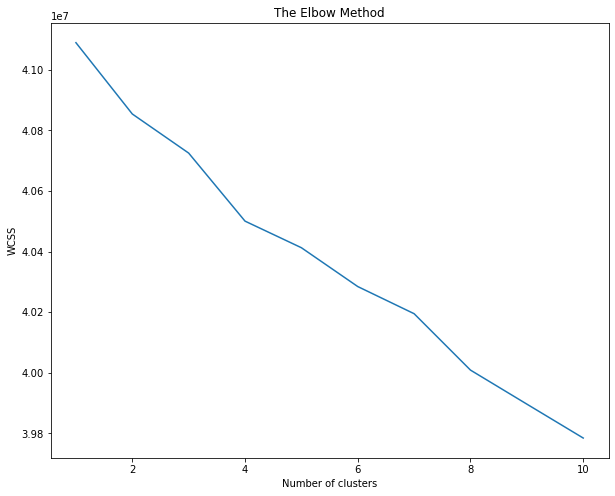

In [27]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_data)
    wcss.append(kmeans.inertia_) # wcss is a list , inertia is a sum of sq
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K-Means Clustering & Cluster Information

In [28]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_data)
data1['Cluster_label']=pd.DataFrame(y_kmeans)

<ipython-input-28-5417fffb4419>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster_label']=pd.DataFrame(y_kmeans)


In [29]:
data1.groupby('Cluster_label')['total_cases'].agg(['count'])

,count
Cluster_label,
0,1362
1,10535
2,1285
3,41197


In [30]:
data1.head()

,iso_code,continent,location,date,total_cases,new_cases,population,median_age,aged_65_older,diabetes_prevalence,Cluster_label
0,AFG,Asia,Afghanistan,2020-02-24,1.0,NaN,38928341.0,18.6,2.581,9.59,3
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,38928341.0,18.6,2.581,9.59,3
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,38928341.0,18.6,2.581,9.59,3
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,38928341.0,18.6,2.581,9.59,3
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,38928341.0,18.6,2.581,9.59,3


#### Exploring different Clusters

##### Cluster_label= 0

In [31]:
a=data1.loc[data1['Cluster_label'] == 0]

In [32]:
a.head()

,iso_code,continent,location,date,total_cases,new_cases,population,median_age,aged_65_older,diabetes_prevalence,Cluster_label
2343,AUS,Oceania,Australia,2020-01-26,4.0,NaN,25499881.0,37.9,15.504,5.07,0
2344,AUS,Oceania,Australia,2020-01-27,5.0,1.0,25499881.0,37.9,15.504,5.07,0
2345,AUS,Oceania,Australia,2020-01-28,5.0,0.0,25499881.0,37.9,15.504,5.07,0
2346,AUS,Oceania,Australia,2020-01-29,6.0,1.0,25499881.0,37.9,15.504,5.07,0
2347,AUS,Oceania,Australia,2020-01-30,9.0,3.0,25499881.0,37.9,15.504,5.07,0


Text(0, 0.5, 'Count')

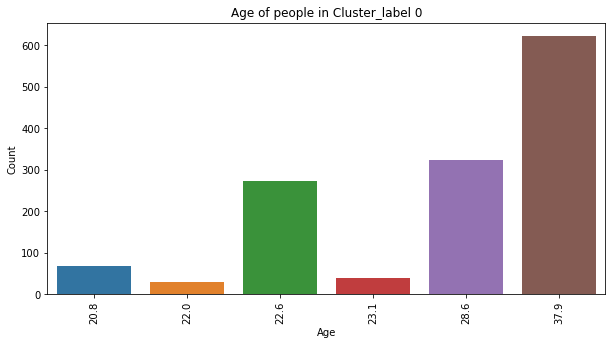

In [46]:
plt.figure(figsize=(10,5))
z=a['median_age'].value_counts().sort_values(ascending=False)
sns.barplot(z.index, z.values)
plt.xticks(rotation=90)
plt.title('Age of people in Cluster_label 0')
plt.xlabel('Age')
plt.ylabel('Count')


##### Cluster_label= 1

In [34]:
b=data1.loc[data1['Cluster_label'] == 1]

In [35]:
b.head()

,iso_code,continent,location,date,total_cases,new_cases,population,median_age,aged_65_older,diabetes_prevalence,Cluster_label
2671,AUT,Europe,Austria,2020-02-25,2.0,NaN,9006400.0,44.4,19.202,6.35,1
2672,AUT,Europe,Austria,2020-02-26,2.0,0.0,9006400.0,44.4,19.202,6.35,1
2673,AUT,Europe,Austria,2020-02-27,3.0,1.0,9006400.0,44.4,19.202,6.35,1
2674,AUT,Europe,Austria,2020-02-28,3.0,0.0,9006400.0,44.4,19.202,6.35,1
2675,AUT,Europe,Austria,2020-02-29,9.0,6.0,9006400.0,44.4,19.202,6.35,1


Text(0, 0.5, 'Count')

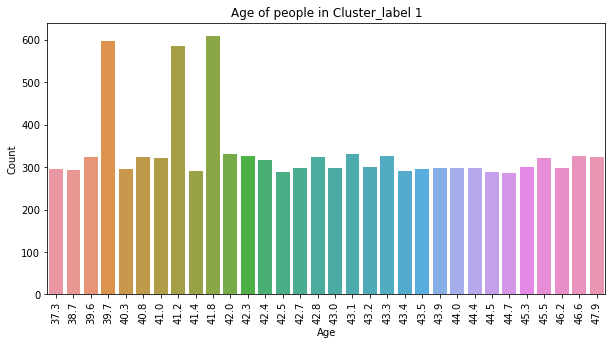

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x=b['median_age'].value_counts().index, y=b['median_age'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Age of people in Cluster_label 1')
plt.xlabel('Age')
plt.ylabel('Count')

##### Cluster_label= 2

In [37]:
c=data1.loc[data1['Cluster_label'] == 2]

In [38]:
c.head()

,iso_code,continent,location,date,total_cases,new_cases,population,median_age,aged_65_older,diabetes_prevalence,Cluster_label
6695,BRA,South America,Brazil,2020-02-26,1.0,NaN,212559409.0,33.5,8.552,8.11,2
6696,BRA,South America,Brazil,2020-02-27,1.0,0.0,212559409.0,33.5,8.552,8.11,2
6697,BRA,South America,Brazil,2020-02-28,1.0,0.0,212559409.0,33.5,8.552,8.11,2
6698,BRA,South America,Brazil,2020-02-29,2.0,1.0,212559409.0,33.5,8.552,8.11,2
6699,BRA,South America,Brazil,2020-03-01,2.0,0.0,212559409.0,33.5,8.552,8.11,2


Text(0, 0.5, 'Count')

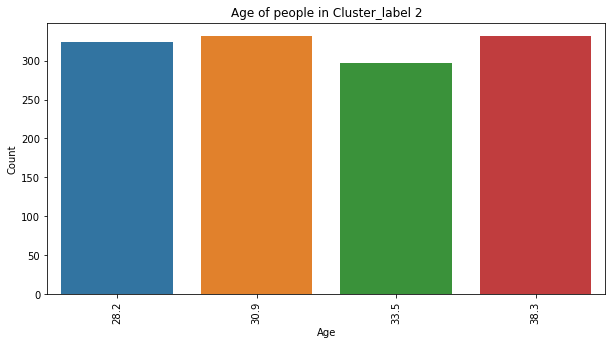

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=c['median_age'].value_counts().index, y=c['median_age'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Age of people in Cluster_label 2')
plt.xlabel('Age')
plt.ylabel('Count')

##### Cluster_label= 3

In [40]:
d=data1.loc[data1['Cluster_label'] == 3]

In [41]:
d.head()

,iso_code,continent,location,date,total_cases,new_cases,population,median_age,aged_65_older,diabetes_prevalence,Cluster_label
0,AFG,Asia,Afghanistan,2020-02-24,1.0,NaN,38928341.0,18.6,2.581,9.59,3
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,38928341.0,18.6,2.581,9.59,3
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,38928341.0,18.6,2.581,9.59,3
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,38928341.0,18.6,2.581,9.59,3
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,38928341.0,18.6,2.581,9.59,3


Text(0, 0.5, 'Count')

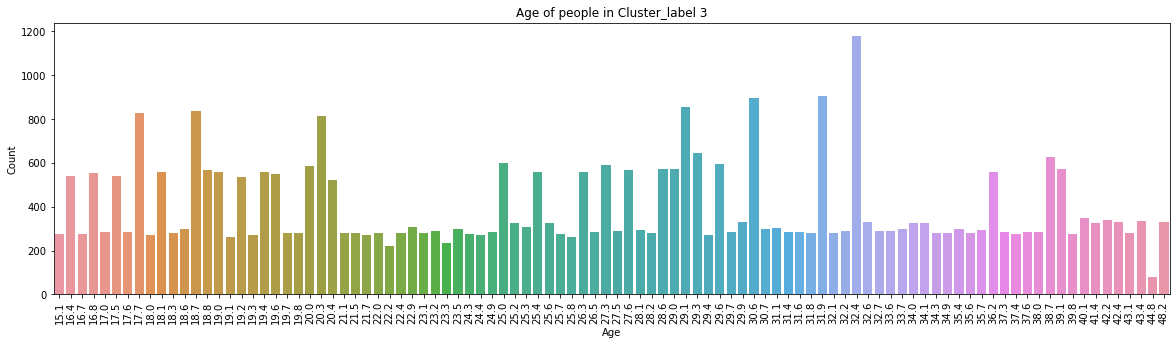

In [45]:
plt.figure(figsize=(20,5))
sns.barplot(x=d['median_age'].value_counts().index, y=d['median_age'].value_counts().values)
plt.xticks(rotation=90, fontsize=10)
plt.title('Age of people in Cluster_label 3')
plt.xlabel('Age')
plt.ylabel('Count')

#### Points we can infer from this exploration :-

#### > Feature Engineering : Useful Features selection from lot of columns
#### > How all the variables are corelated ?
#### > How total cases are increasing with the time ?
#### > Number of cases in different Continents, location
#### > Clustering of the dataset
#### > different factors in different groups 
